# Multigrid Procedure



1. <div style='background-color:#d0e8ff'>Iterate on $A_h u = b_h$ to reach $u_h$ (say $3$ Jacobi or Gauss-Seidel steps).</div>
2. <div style='background-color:#ffe8d0'>Restrict the residual $r_h = b_h-A_h u_h$ to the coarse grid by <span style='background-color:white'>$r_{2h} = R_h^{2h}r_h$</span>.</div>
3. <div style='background-color:#d0e8ff'>Solve <span style='background-color:white'>$A_{2h}E_{2h} = r_{2h}$</span> (or come close to $E_{2h}$ by $3$ iteratiions form $E=0$).</div>
4. <div style='background-color:#ffe8d0'>Interpolate $E_{2h}$ back to <span style='background-color:white'>$E_h = I_{2h}^h E_{2h}$</span>. Add $E_h$ to $u_h$.</div>
5. <div style='background-color:#d0e8ff'>Iterate $3$ more times on $A_h u = b_h$ starting from the improved $u_h+E_h$.</div>

where, 
- <div style='background-color:#eeeeee'>$A_h = A$ is the original matrix.</div>
- $u$ is the unknown vector we need to solve.
- <div style='background-color:#eeeeee'>$b_h = b$ is the initial residual vector.</div>
- $u_h$ is the new $u$ after several pure iterations.
- <div style='background-color:#eeeeee'>$r_h$ is the residual after several pure iterations.</div>
- $R_h^{2h}$ is the restriction matrix for transfering the vector from the grid of size $h$ to the grid of size $2h$ (from fine grid to coarse grid).
- <div style='background-color:#eeeeee'>$r_{2h}$ is the residual in the coarse grid.</div>
- $E_{2h}$ is the solution in the coarse grid.
- <div style='background-color:#eeeeee'>$A_{2h}$ is the matrix $A$ in the coarse grid.</div>
- $I_{2h}^h$ is the intepolation matrix for transfering the vector from the grid of size $2h$ to the grid of size $h$ (from coarse grid to fine grid).
- <div style='background-color:#eeeeee'>$E_h$ is the solution of the residual part $AE_h = r_h$. We can add $E_h$ as a compensation to $u_h$ to obtain a more precise solution of $u$.</div>

In this procedure, step <span style='background-color:#d0e8ff'>1,3,5</span> can all be implemneted by pure interations. And the remaining step <span style='background-color:#ffe8d0'>2,4</span> are the core parts of the multigrid algorithms.

Step 2 and 4 are the transformation between the fine grid and coarse grid. So before looking insight the multigrid algorithm, we need to be clear what are the fine grid and coarse grid. Actually, each point in the grid can be view as a sampling position.



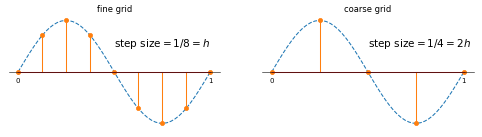

fine grid vector is:  [ 0.    0.71  1.    0.71  0.   -0.71 -1.   -0.71 -0.  ]
coarse grid vector is:  [ 0.  1.  0. -1. -0.]


In [2]:
import matplotlib.pyplot as plt
import numpy as np

f = lambda x: np.sin(2*np.pi*x)

def axesAdjust(ax):
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_position("zero")
    ax.spines["left"].set_color("none")
    ax.spines["right"].set_color("none")
    
    ax.set_xticks([0,1])
    ax.set_yticks([])
    

def main():
    fig = plt.figure(figsize=(12, 3), dpi=50)
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    
    axesAdjust(ax1)
    axesAdjust(ax2)
    
    x = np.linspace(0, 1, 50)
    y = f(x)
    ax1.plot(x, y, linestyle='dashed')
    ax2.plot(x, y, linestyle='dashed')
    
    x1 = np.linspace(0, 1, 9)
    y1 = f(x1)
    ax1.stem(x1, y1, 'C1', markerfmt='o')
    ax1.set_title("fine grid")
    ax1.text(.5, .5, r"step size$=1/8=h$", fontsize=15)
    
    x2 = np.linspace(0, 1, 5)
    y2 = f(x2)
    ax2.stem(x2, y2, 'C1', markerfmt='o')
    ax2.set_title("coarse grid")
    ax2.text(.5, .5, r"step size$=1/4=2h$", fontsize=15)
    
    plt.show()
        
    print("fine grid vector is: ", np.round(y1, 2))
    print("coarse grid vector is: ", np.round(y2, 2))
    
if __name__=="__main__":
    main()

Before we start, it should be clarified that the vectors for downsampling and upsampling are always considered zero-bounded, which can be denoted by $u[0] = u[N+1] = 0$.

The matrix $R_h^{2h}$ is responsible for downsampling. We use its simple form as follows.

$$R_h^{2h} = \frac{1}{4}
\underbrace{
\begin{bmatrix}
1 &2 &1 &0 &0 &\cdots &0\\
0 &0 &1 &2 &1 &\cdots &0\\
0 &0 &0 &0 &1 &\cdots &0\\
\vdots &\vdots &\vdots &\vdots &\vdots &\ddots &\vdots\\
0 &0 &0 &0 &0 &\cdots &1
\end{bmatrix}}_{(N-1)/2\times N}$$

The matrix $I_{2h}^{h}$ is responsible for upsampling. We use its simple form as follows.

$$I_{2h}^{h} = \frac{1}{2}
\underbrace{
\begin{bmatrix}
1 &0 &0 &\cdots &0\\
2 &0 &0 &\cdots &0\\
1 &1 &0 &\cdots &0\\
0 &2 &0 &\cdots &0\\
0 &1 &1 &\cdots &0\\
\vdots &\vdots &\vdots &\ddots &\vdots\\
0 &0 &0 &\cdots &1
\end{bmatrix}}_{N\times (N-1)/2} = 2(R_{h}^{2h})^T$$

We can take the following form in order to transfer a 2 dimensional matrix from a fine grid to coarse grid.

$$A_{2h} = R_{h}^{2h} A_h I_{2h}^{h}$$



---------

In the following discussion, we shall show the reason why we need multigrid and why it has such procedure.


# Convergence of pure iterations

Recalling from the previous course, we obtained the iterative form of solution error.

$$e_{k+1} = (I-P^{-1}A)e_k = Me_k$$

After $k$ iterations, the error has the form

$$e_k = (M)^k e_0$$

Consider that the matrix $M$ has $N$ eigenvectors and $N$ corresponding eigenvalues, then the error can be view as the linear combination of these eigenvectors. As a result, the convergence of error is determined by the eigenvalues of $M$.

$$e_k = \lambda_1^k a_1y_1 + \lambda_2^k a_2y_2 + \cdots + \lambda_N^k a_Ny_N$$

We use $\rho$ to denote the maximum magnitude of these eigenvalues. If $\rho<1$, the error is certainly convergent. 

Now let's take a look at the weighted Jacobi algorithm.

The eigenvectors and its corresponding eigenvalues of a $N\times N$ Poisson matrix $A$ are as follows.

$$\begin{array}{ll}
\text{Low} &v_1 = [sin\frac{\pi}{N+1}\ sin\frac{2\pi}{N+1}\ sin\frac{3\pi}{N+1}\ \cdots\ sin\frac{N\pi}{N+1}]^T &\lambda_1 = 2-2cos\frac{\pi}{N+1}\\
 &v_2 = [sin\frac{2\pi}{N+1}\ sin\frac{2*2\pi}{N+1}\ sin\frac{3*2\pi}{N+1}\ \cdots\ sin\frac{N*2\pi}{N+1}]^T &\lambda_2 = 2-2cos\frac{2\pi}{N+1}\\
 &\vdots\\
 &v_k = [sin\frac{k\pi}{N+1}\ sin\frac{2k\pi}{N+1}\ sin\frac{3k\pi}{N+1}\ \cdots\ sin\frac{Nk\pi}{N+1}]^T &\lambda_k = 2-2cos\frac{k\pi}{N+1}\\
 &\vdots\\
\text{High} &v_N = [sin\frac{N\pi}{N+1}\ sin\frac{2N\pi}{N+1}\ sin\frac{3N\pi}{N+1}\ \cdots\ sin\frac{NN\pi}{N+1}]^T &\lambda_N = 2-2cos\frac{N\pi}{N+1}\\
\end{array}$$

Every eigenvector is a discrete fourier (sine) basis of different frequencies, and there are $N$ sampling points within each basis.

For weighted Jacobi, the matrix $M$ has the form
$$M = I-\frac{w}{2}A$$
Thus the eigenvectors doesn't change, but the eigenvalues become

$$\lambda_k(M) = 1-w+w cos\frac{k\pi}{N+1}$$

As a result, the high frequency components of the error vector will be smoothed in a number of iterations.


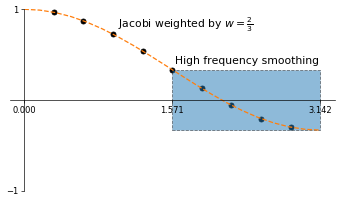

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

f = lambda x, w: 1-w+w*np.cos(x)

def dran_rect(ax, x, y, w, h):
    rect = Rectangle((x, y), w, h)
    # Create patch collection with specified colour/alpha
    pc = PatchCollection([rect], facecolor='C0', alpha=.5,
                         edgecolor='k', linestyle='dashed')
    # Add collection to axes
    ax.add_collection(pc)

def main():
    fig = plt.figure(figsize=(7,4), dpi=60)
    ax = fig.add_subplot(1,1,1)
    ax.set_ylim(-1, 1)
    ax.set_yticks([-1, 1])
    ax.set_xticks([0, np.pi/2, np.pi])
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_position("zero")
    ax.spines["left"].set_position("zero")
    ax.spines["right"].set_color("none")
    
    N = 9
    w = 2/3
    k = np.linspace(0, N+1, 20)
    x = (k*np.pi)/(N+1)
    y = f(x, w)
    ax.plot(x, y, color='C1', linestyle='dashed')
    
    k = np.arange(1, N+1)
    x = (k*np.pi)/(N+1)
    y = f(x, w)
    ax.scatter(x, y, color='k')
    
    dran_rect(ax, np.pi/2, -1/3, np.pi/2, 2/3)
    ax.text(1, .8, r"Jacobi weighted by $w=\frac{2}{3}$", fontsize=13)
    ax.text(1.6, .4, "High frequency smoothing", fontsize=13)
    plt.show()
    

if __name__=="__main__":
    main()

The problem is that the low frequency components convergent too slow. Thus our goal turns out to make the low frequency components convergent faster.

--------------------

# Decimation and Interpolation

In discrete signal processing, the frequency can be extended from low frequency to high frequency using the technique of downsampling, or say decimation. And upsampling, also known as interpolation, is the inverse operation that will narrow the frequency.

After the frequency extended, we can make use of approach like weighted Jacobi again to smoothen the error, and use interpolation for recovery at last. This is the reason why we need restriction and interpolation in multigrid.

--------------

# Error evolution

## The evolution matrix

In this section, we shall focus on how does the error evolve during the step 2,3,4. From now on, we ommit the sub and sup tag of $A_h, R_h^{2h}, I_{2h}^h$ to keep the notation uncluttered.

1. After step 1, the error is
$$e_h = u - u_h$$
and the residual is 
$$r_h = b - Au_h = Au - Au_h = Ae_h$$
2. In step 2, the residual is restricted by $R$
$$r_{2h} = R r_h = RAe_h$$
3. In step 3, we solve the coarse grid equation to obtain $E_{2h}$
$$E_{2h} = A_{2h}^{-1} r_{2h} = (RAI)^{(-1)}RAe_h$$
4. In step 4, the coarse grid solution is interpolated to obtain $E_h$
$$E_h = I E_{2h} = I(RAI)^{-1}RAe_h = Se_h\qquad \text{let } S = I(RAI)^{-1}RA$$
5. In step 5, the coarse grid solution is added to the $u_h$, thus the new error is 
$$e_h' = (I-S)e_h$$


where $I-S$ can be intepreted as the total evolution matrix of the error $e_h$ in the multigrid procedure. The property of $I-S$ can help us visualize how does the error change in the multigrid algorithm. 

## Eigenvalue and eigenvector of the evolution matrix

### Eigenvalues
From the form of $S$, we notice the square of $S$ is still $S$

$$S^2 = I(RAI)^{-1}RAI(RAI)^{-1}RA = I(RAI)^{-1}RA = S$$

Assume that $e$ is a eigenvector of $S$, and the corresponding eigenvalue is $\lambda$. Then 

$$\left.\begin{array}{ll}
Se = \lambda e\\
SSe = \lambda^2 e\\
SS = S
\end{array}\right\}\lambda^2 = \lambda\Rightarrow \bbox[#ffe8d0]{\lambda = 0,1}$$

whereas for $(I-S)$, the eigenvalues are just reversed.

### Eigenvectors

Form the perspective of fourier analysis, a vector (discrete signal) can be synthesized by fourier basis of different frequencies. Here are a pair of low frequency and a high frequency discrete fourier (sine) basis.

$$\begin{array}{ll}
\text{Low frequency:} &y_k = \left(sin\frac{k\pi}{N+1}, sin\frac{2k\pi}{N+1},\cdots\right) \\
\text{High frequency:} &Y_k = \left(sin\frac{(N+1-k)\pi}{N+1}, sin\frac{2(N+1-K)\pi}{N+1},\cdots\right) = \left(+sin\frac{k\pi}{N+1}, -sin\frac{2k\pi}{N+1},\cdots\right) 
\end{array}$$

where $\color{red}{k = 1,2, \cdots, (N+1)/2}$

If $(I-S)$ multiply by these two frequency basis respectively, we obtain 

$$\bbox[#d0e8ff]{\begin{array}{ll}
(I-S)y_k = \frac{1}{2}\left(1-cos\frac{k\pi}{N+1}\right)(y_k+Y_k) &(18)\\
(I-S)Y_k = \frac{1}{2}\left(1+cos\frac{k\pi}{N+1}\right)(y_k+Y_k) &(19)
\end{array}}$$


From these formulas, we can make several key points:

1. If the vector $e$ has only low frequencies like $y_1, y_2, y_3$, then these low frequencies are greatly reduced by multigrid due to $\left(1-cos\frac{k\pi}{N+1}\right)\approx 0$.
2. If the vector $e$ has high frequencies like $Y_1, Y_2, Y_3$, then these high frequencies will be extended to the its symmetric low frequency by multigrid due to $\left(1+cos\frac{k\pi}{N+1}\right)\approx 1$.
3. It is obvious that $(I-S)(y_k+Y_k) = (y_k+Y_k)$. Thus the eigenvalues are $\lambda=1$, and their corresponding eigenvectors are $\bbox[#ffe8d0]{e_{\lambda=1} = y_k+Y_k}$.
4. For the case $\lambda = 0$, the corrsponding eigenvectors can also be computed by making use of formula (18) and (19). Multiply (18) and (19) by $\left(1+cos\frac{k\pi}{N+1}\right)$ and $\left(1-cos\frac{k\pi}{N+1}\right)$ respectively, then the right-hand sides are now the same and we subtract to obtain

$$(I-S)\bbox[#ffe8d0]{e_{\lambda = 0}} = (I-S)\left[\bbox[#ffe8d0]{\left(1+cos\frac{k\pi}{N+1}\right)y_k-\left(1-cos\frac{k\pi}{N+1}\right)Y_k }\right] = 0$$

It can be concluded that 
- $e_{\lambda=1}$ is the mixtures of the symmetric frequencies. Multigrid doesn't process these components.
- $e_{\lambda=0}$ is the weighted combination of the symmetric frequencies. However, the range of $k$ is $1,2, \cdots, (N+1)/2$, thus the lower the frequency, the higher the weight. In other words, the eigenvector $e_{\lambda=0}$ stores large amounts of lower frequencies and a few high frequencies. Multigrid kills these components completely.

We will receive a smooth error vector $e_h$ after Jacobi iterations have reduced its high frequency components, such error vector has only small components along the eigenvectors $e_{\lambda=1}$. Multigrid doesn't touch those pieces ($\lambda=1$). The larger components along $e_{\lambda=0}$ will die.


-------------

# V-Cycles and W-Cycles and Full Multigrid

In practice, we invoke multigrid algorithm recursively for faster error reduction. Read the book for more details.

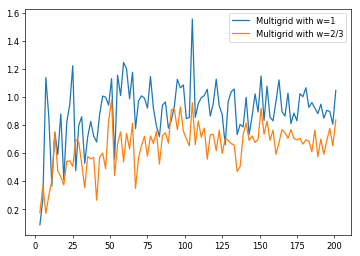

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse.linalg as alg


def gen_matrices(d):
    A = np.zeros((d, d))
    for i in range(d):
        A[i][i] = 2
        if i != 0:
            A[i][i-1] = -1
        if i != d-1:
            A[i][i+1] = -1
    row = d//2
    R = np.zeros((row, d))
    for i in range(row):
        R[i][2*i] = 1
        R[i][2*i+1] = 2
        R[i][2*i+2] = 1
    R = 1/4*R
    I = 2*R.T
    b = np.random.uniform(-10, 10, d)
    return A, b, R, I
    
# A = np.array([[ 2, -1,  0,  0,  0],
#               [-1,  2, -1,  0,  0],
#               [ 0, -1,  2, -1,  0],
#               [ 0,  0, -1,  2, -1],
#               [ 0,  0,  0, -1,  2]])

# R = 1/4*np.array([[1, 2, 1, 0, 0],
#                   [0, 0, 1, 2, 1]])
# I = 2*R.T

# b = np.random.uniform(-10, 10, 5)

def CustomJacobi(n, A, b, x=None, w=1):
    if x is None:
        x = np.zeros(b.shape)
    I = np.identity(len(x))
    P = A * np.identity(len(x))/w
    invP = np.linalg.inv(P)
    M = I - invP @ A
    #print("eigenvalue of M is\n {}\n".format(np.linalg.eig(M)[0]))
    for i in range(n):
        x = M @ x + invP @ b
    return x

def multigrid(n, A, b, R, I, w):
    u = CustomJacobi(n//3, A, b, None, w)
    r = b - A @ u
    r2h = R @ r
    A2h = R @ A @ I
    #E2h = CustomJacobi( n//3, A2h, r2h, None, 1)
    E2h = np.linalg.inv(A2h) @ r2h
    E = I @ E2h
    u = u + E
    u = CustomJacobi(n//3, A, b, u, 1)
    return u
    
        

def compare(d):
    A, b, R, I = gen_matrices(d)
    
    n = 9
    X = np.linalg.solve(A, b)
    x = CustomJacobi(n, A, b)
    error1 = np.sqrt(np.sum((x-X)**2)/d)
    
    x = multigrid(n, A, b, R, I, 1)
    error2 = np.sqrt(np.sum((x-X)**2)/d)
    
    x = multigrid(n, A, b, R, I, 2/3)
    error3 = np.sqrt(np.sum((x-X)**2)/d)
    return error1, error2, error3
    
def main():
    fig = plt.figure(figsize=(7,5), dpi=60)
    ax = fig.add_subplot(1,1,1)
    
    E1 = np.array([])
    E2 = np.array([])
    E3 = np.array([])
    D = np.array([])
    for i in range(100):
        d = 2*i+3
        e1, e2, e3 = compare(d)
        E1 = np.hstack((E1, e1))
        E2 = np.hstack((E2, e2))
        E3 = np.hstack((E3, e3))
        D = np.hstack((D, d))
    #ax.plot(D, E1, label="Jacobi")
    ax.plot(D, E2, label="Multigrid with w=1")
    ax.plot(D, E3, label="Multigrid with w=2/3")
    ax.legend()

if __name__=="__main__":
    main()